In [1]:
# %%
import os
# Import pca
import dotenv
from ctd.comparison.analysis.tt.tasks.tt_RandomTarget import TT_RandomTarget
from ctd.comparison.analysis.dt.dt import Analysis_DT   
from ctd.comparison.comparison import Comparison


In [2]:

dotenv.load_dotenv(dotenv.find_dotenv())

HOME_DIR = os.environ["HOME_DIR"]
print(HOME_DIR)

pathTT = (
    HOME_DIR
    + "content/trained_models/task-trained/20240531_RandomTarget_NoisyGRU_GoPulse/max_epochs=2500 latent_size=128 n_samples=1100 n_samples=1100 seed=0 learning_rate=0.001/"
)

an_TT = TT_RandomTarget(run_name = "TT", filepath = pathTT)



/home/csverst/Github/CtDBenchmark/


In [3]:

path_LFADS_Sweep = pathTT + "20240601_LFADS_ExtInputs_RandomTarget_Final/"
subfolders_LFADS = [f.path for f in os.scandir(path_LFADS_Sweep) if f.is_dir()]

path_LFADS_inf_Sweep = pathTT + "20240601_LFADS_InfInputs_RandomTarget_Final/"
subfolder_LFADS_inf = [f.path for f in os.scandir(path_LFADS_inf_Sweep) if f.is_dir()]

path_GRU_Sweep = pathTT + "20240601_GRU_ExtInputs_RandomTarget_Final/"
subfolders_GRU = [f.path for f in os.scandir(path_GRU_Sweep) if f.is_dir()]

path_NODE_Sweep = pathTT + "20240601_NODE_ExtInputs_RandomTarget_Final/"
subfolders_NODE = [f.path for f in os.scandir(path_NODE_Sweep) if f.is_dir()]

array([0.44191747, 0.19364329, 0.12267806, 0.10563304, 0.03772644,
       0.02910731, 0.0123511 , 0.01050019, 0.00707806, 0.00553588])

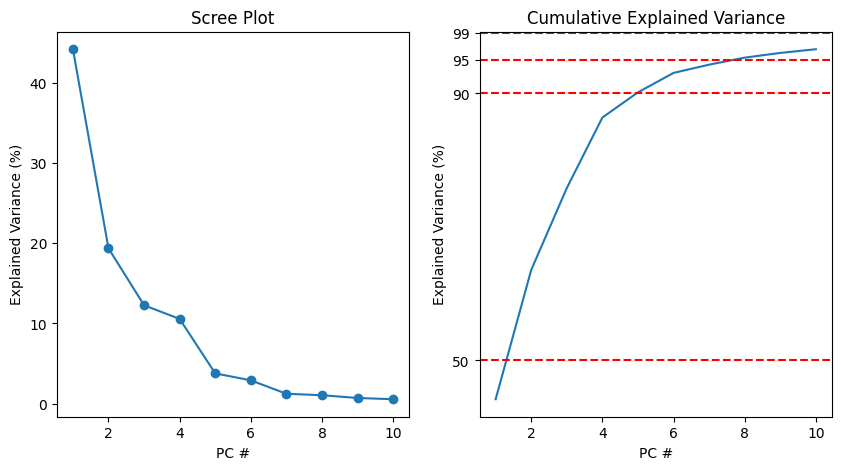

In [9]:
an_TT.plot_scree()
# an_TT.plot_trial_io(num_trials = 10)
# an_TT.plot_trial_latents(num_trials = 4)

In [7]:
comparison = Comparison(comparison_tag="DTRandomTargetTest")
comparison.load_analysis(an_TT, reference_analysis=True, group = "TT")

for num, subfolder in enumerate(subfolders_LFADS):
    subfolder = subfolder + "/"
    analysis_GRU = Analysis_DT(run_name = f"LFADS_{num}", filepath = subfolder, model_type = "LFADS")
    comparison.load_analysis(analysis_GRU, group = "LFADS")

for num, subfolder in enumerate(subfolder_LFADS_inf):
    subfolder = subfolder + "/"
    analysis_GRU = Analysis_DT(run_name = f"LFADS_inf_{num}", filepath = subfolder, model_type = "LFADS")
    comparison.load_analysis(analysis_GRU, group = "LFADS_inf")

for num, subfolder in enumerate(subfolders_GRU):
    subfolder = subfolder + "/"
    analysis_GRU = Analysis_DT(run_name = f"GRU_{num}", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_GRU, group = "GRU")

for num, subfolder in enumerate(subfolders_NODE):
    subfolder = subfolder + "/"
    analysis_NODE = Analysis_DT(run_name = f"NODE_{num}", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_NODE, group = "NODE")

Working on 1 of 21: TT
Group: TT
Working on 2 of 21: LFADS_0
Group: LFADS
Rate R2: 0.8984973021224506
State R2: 0.8970377304650514
Working on 3 of 21: LFADS_1
Group: LFADS
Rate R2: 0.9011273907815908
State R2: 0.9049000801545446
Working on 4 of 21: LFADS_2
Group: LFADS
Rate R2: 0.9033763545149608
State R2: 0.9053264731528909
Working on 5 of 21: LFADS_3
Group: LFADS
Rate R2: 0.905910013447957
State R2: 0.8924911762926813
Working on 6 of 21: LFADS_4
Group: LFADS
Rate R2: 0.9091779872618221
State R2: 0.9024553217278206
Working on 7 of 21: LFADS_inf_0
Group: LFADS_inf
Rate R2: 0.8393987543586177
State R2: 0.8986654043779906
Working on 8 of 21: LFADS_inf_1
Group: LFADS_inf
Rate R2: 0.8420587288046721
State R2: 0.8727474473880336
Working on 9 of 21: LFADS_inf_2
Group: LFADS_inf
Rate R2: 0.8566912422429211
State R2: 0.874349957807372
Working on 10 of 21: LFADS_inf_3
Group: LFADS_inf
Rate R2: 0.8477492215157025
State R2: 0.8732725240073197
Working on 11 of 21: LFADS_inf_4
Group: LFADS_inf
Rate

array([[0.        , 0.        ],
       [0.8984973 , 0.89703773],
       [0.90112739, 0.90490008],
       [0.90337635, 0.90532647],
       [0.90591001, 0.89249118],
       [0.90917799, 0.90245532],
       [0.83939875, 0.8986654 ],
       [0.84205873, 0.87274745],
       [0.85669124, 0.87434996],
       [0.84774922, 0.87327252],
       [0.84356844, 0.88801645],
       [0.8316753 , 0.90900523],
       [0.82209034, 0.90945961],
       [0.84066651, 0.91519528],
       [0.84311796, 0.91411366],
       [0.83208098, 0.90951784],
       [0.87918537, 0.87982998],
       [0.86733958, 0.87041035],
       [0.88234093, 0.87612574],
       [0.88458543, 0.86632206],
       [0.87919483, 0.86393199]])

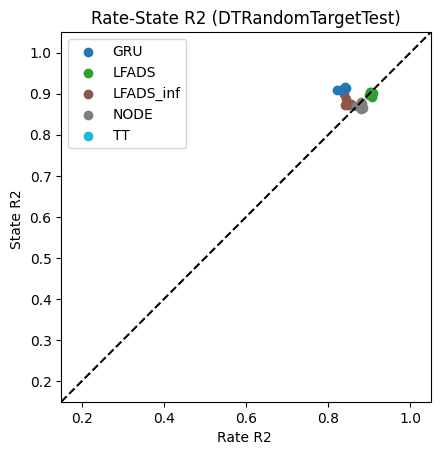

In [8]:
plot_dict = {
    "save_pdf": True,
    "ax_lim": [0.15, 1.05],
    "marker": "o",
}
comparison.compare_rate_state_r2(plot_dict = plot_dict)